In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame(columns=['system', 'rep', 'data','mean','std'])
data=np.array([10,20,30,40,50,60])
new_ent = pd.DataFrame({'system': 'test',
                                'rep': 1,
                                'data': data,
                                'mean': 1.4,
                                'std': 0.07,
                               })
df = pd.concat([df, new_ent])

,system,rep,data,mean,std
0,test,1,10,1.4,0.07
1,test,1,20,1.4,0.07
2,test,1,30,1.4,0.07
3,test,1,40,1.4,0.07
4,test,1,50,1.4,0.07
5,test,1,60,1.4,0.07


In [100]:
# initiate test df

d = {}

d['A769'] = pd.DataFrame(columns=['t', 'rep1', 'rep2', 'rep3'],
                                         data=[[10, 0.89, 0.98, 0.31],
                                               [20, 0.34, 0.78, 0.34]]).set_index('t')

pd.concat(d, axis=1)

d['PF739'] = pd.DataFrame(columns=['t', 'rep1', 'rep2', 'rep3'],
                                         data=[[10, 0.89, 0.98, 0.31],
                                               [20, 0.34, 0.78, 0.34]]).set_index('t')

df = pd.concat(d, axis=1)
df2 = df.copy()
s = {'a2b1':df, 'a2b2':df2}
new = pd.concat(s,axis=1)
new

a2b1                                a2b2                              
    A769             PF739              A769             PF739            
    rep1  rep2  rep3  rep1  rep2  rep3  rep1  rep2  rep3  rep1  rep2  rep3
t                                                                         
10  0.89  0.98  0.31  0.89  0.98  0.31  0.89  0.98  0.31  0.89  0.98  0.31
20  0.34  0.78  0.34  0.34  0.78  0.34  0.34  0.78  0.34  0.34  0.78  0.34

In [111]:
# create new column


new_data = np.array([[10, 10.89],[20, 10.34]])

inp = pd.DataFrame(columns=['t', 'rep1'],
                   data=new_data).set_index('t')
inp_l = pd.concat({'MT':inp}, axis=1)
inp_s = pd.concat({'a2b1':inp_l}, axis=1)


if any([(mi == inp_s.columns)[0] for mi in new.columns]):
    print("Updating values in DataFrame.")
    new.update(inp_s)
else:
    print("Adding new values to DataFrame.")
    new = new.join(inp_s)

# reorder columns
new = new.iloc[:, new.columns.sortlevel(0, sort_remaining=True)[1]]

Updating values in DataFrame.


In [113]:
new.to_hdf('./test.h5',key='df')

In [114]:
reload = pd.read_hdf('./test.h5',key='df')

In [118]:
new.a2b1

A769                 MT       PF739            
    rep1  rep2  rep3   rep1  rep2  rep1  rep2  rep3
t                                                  
10  0.89  2.89  0.31  10.89  2.89  0.89  0.98  0.31
20  0.34  2.34  0.34  10.34  2.34  0.34  0.78  0.34

In [117]:
reload.a2b1

A769                 MT       PF739            
    rep1  rep2  rep3   rep1  rep2  rep1  rep2  rep3
t                                                  
10  0.89  2.89  0.31  10.89  2.89  0.89  0.98  0.31
20  0.34  2.34  0.34  10.34  2.34  0.34  0.78  0.34

array([10, 20])

In [24]:
new['a2b1']['A769']['rep1'] = np.array([1,2])

In [122]:
from glob import glob

In [130]:
glob('/media/rhys/Storage/ampk_metad_all_data/**/R*/*_final.xtc', recursive=True)

['/media/rhys/Storage/ampk_metad_all_data/a2b2+MT47/06-MetaD/R1/metad_a2b2+MT47_final.xtc',
 '/media/rhys/Storage/ampk_metad_all_data/a2b2+MT47/06-MetaD/R3/metad_a2b2+MT47_final.xtc',
 '/media/rhys/Storage/ampk_metad_all_data/a2b2+MT47/06-MetaD/R2/metad_a2b2+MT47_final.xtc',
 '/media/rhys/Storage/ampk_metad_all_data/a2b1+SC4/06-MetaD/R1/metad_a2b1+SC4_final.xtc',
 '/media/rhys/Storage/ampk_metad_all_data/a2b1+SC4/06-MetaD/R3/metad_a2b1+SC4_final.xtc',
 '/media/rhys/Storage/ampk_metad_all_data/a2b1+SC4/06-MetaD/R2/metad_a2b1+SC4_final.xtc',
 '/media/rhys/Storage/ampk_metad_all_data/a2b2+SC4/06-MetaD/R1/metad_a2b2+SC4_final.xtc',
 '/media/rhys/Storage/ampk_metad_all_data/a2b2+SC4/06-MetaD/R3/metad_a2b2+SC4_final.xtc',
 '/media/rhys/Storage/ampk_metad_all_data/a2b2+SC4/06-MetaD/R2/metad_a2b2+SC4_final.xtc',
 '/media/rhys/Storage/ampk_metad_all_data/a2b1+MT47/06-MetaD/R1/metad_a2b1+MT47_final.xtc',
 '/media/rhys/Storage/ampk_metad_all_data/a2b1+MT47/06-MetaD/R3/metad_a2b1+MT47_final.xtc',


In [131]:
A = '/media/rhys/Storage/ampk_metad_all_data/a2b2+MT47/06-MetaD/R1/metad_a2b2+MT47_final.xtc'

In [133]:
'/'.join(A.split('/')[:-1])

'/media/rhys/Storage/ampk_metad_all_data/a2b2+MT47/06-MetaD/R1'

In [5]:
import sys
sys.path.append('/home/rhys/phd_tools/SAPS')                                    
import analysis_tools as at       

data = at.measure_rmsd('/media/rhys/Storage/ampk_metad_all_data/a2b2+MT47/06-MetaD/R1/md_dry.pdb',
                        '/media/rhys/Storage/ampk_metad_all_data/a2b2+MT47/06-MetaD/R1/metad_a2b2+MT47_final.xtc',
                      '/media/rhys/Storage/ampk_metad_all_data/a2b2+MT47/06-MetaD/R1/md_dry.pdb',
                      ["resname MOL and not name H*"]).run()

In [12]:
bbdata = data.rmsd[:,[1,2]]
ligdata = data.rmsd[:,[1,3]]

In [13]:
ligdata

array([[0.00000000e+00, 8.96130647e-06],
       [2.00000000e+00, 4.64749442e-01],
       [4.00000000e+00, 4.62080287e-01],
       ...,
       [4.99996000e+05, 1.38753630e+01],
       [4.99998000e+05, 1.37225064e+01],
       [5.00000000e+05, 1.36800715e+01]])

In [15]:
df = pd.read_hdf('/media/rhys/Storage/ampk_metad_all_data/backbone_rmsd.h5',key='df')

In [16]:
type(df['a2b1']['A769']['R1'].values)

numpy.ndarray

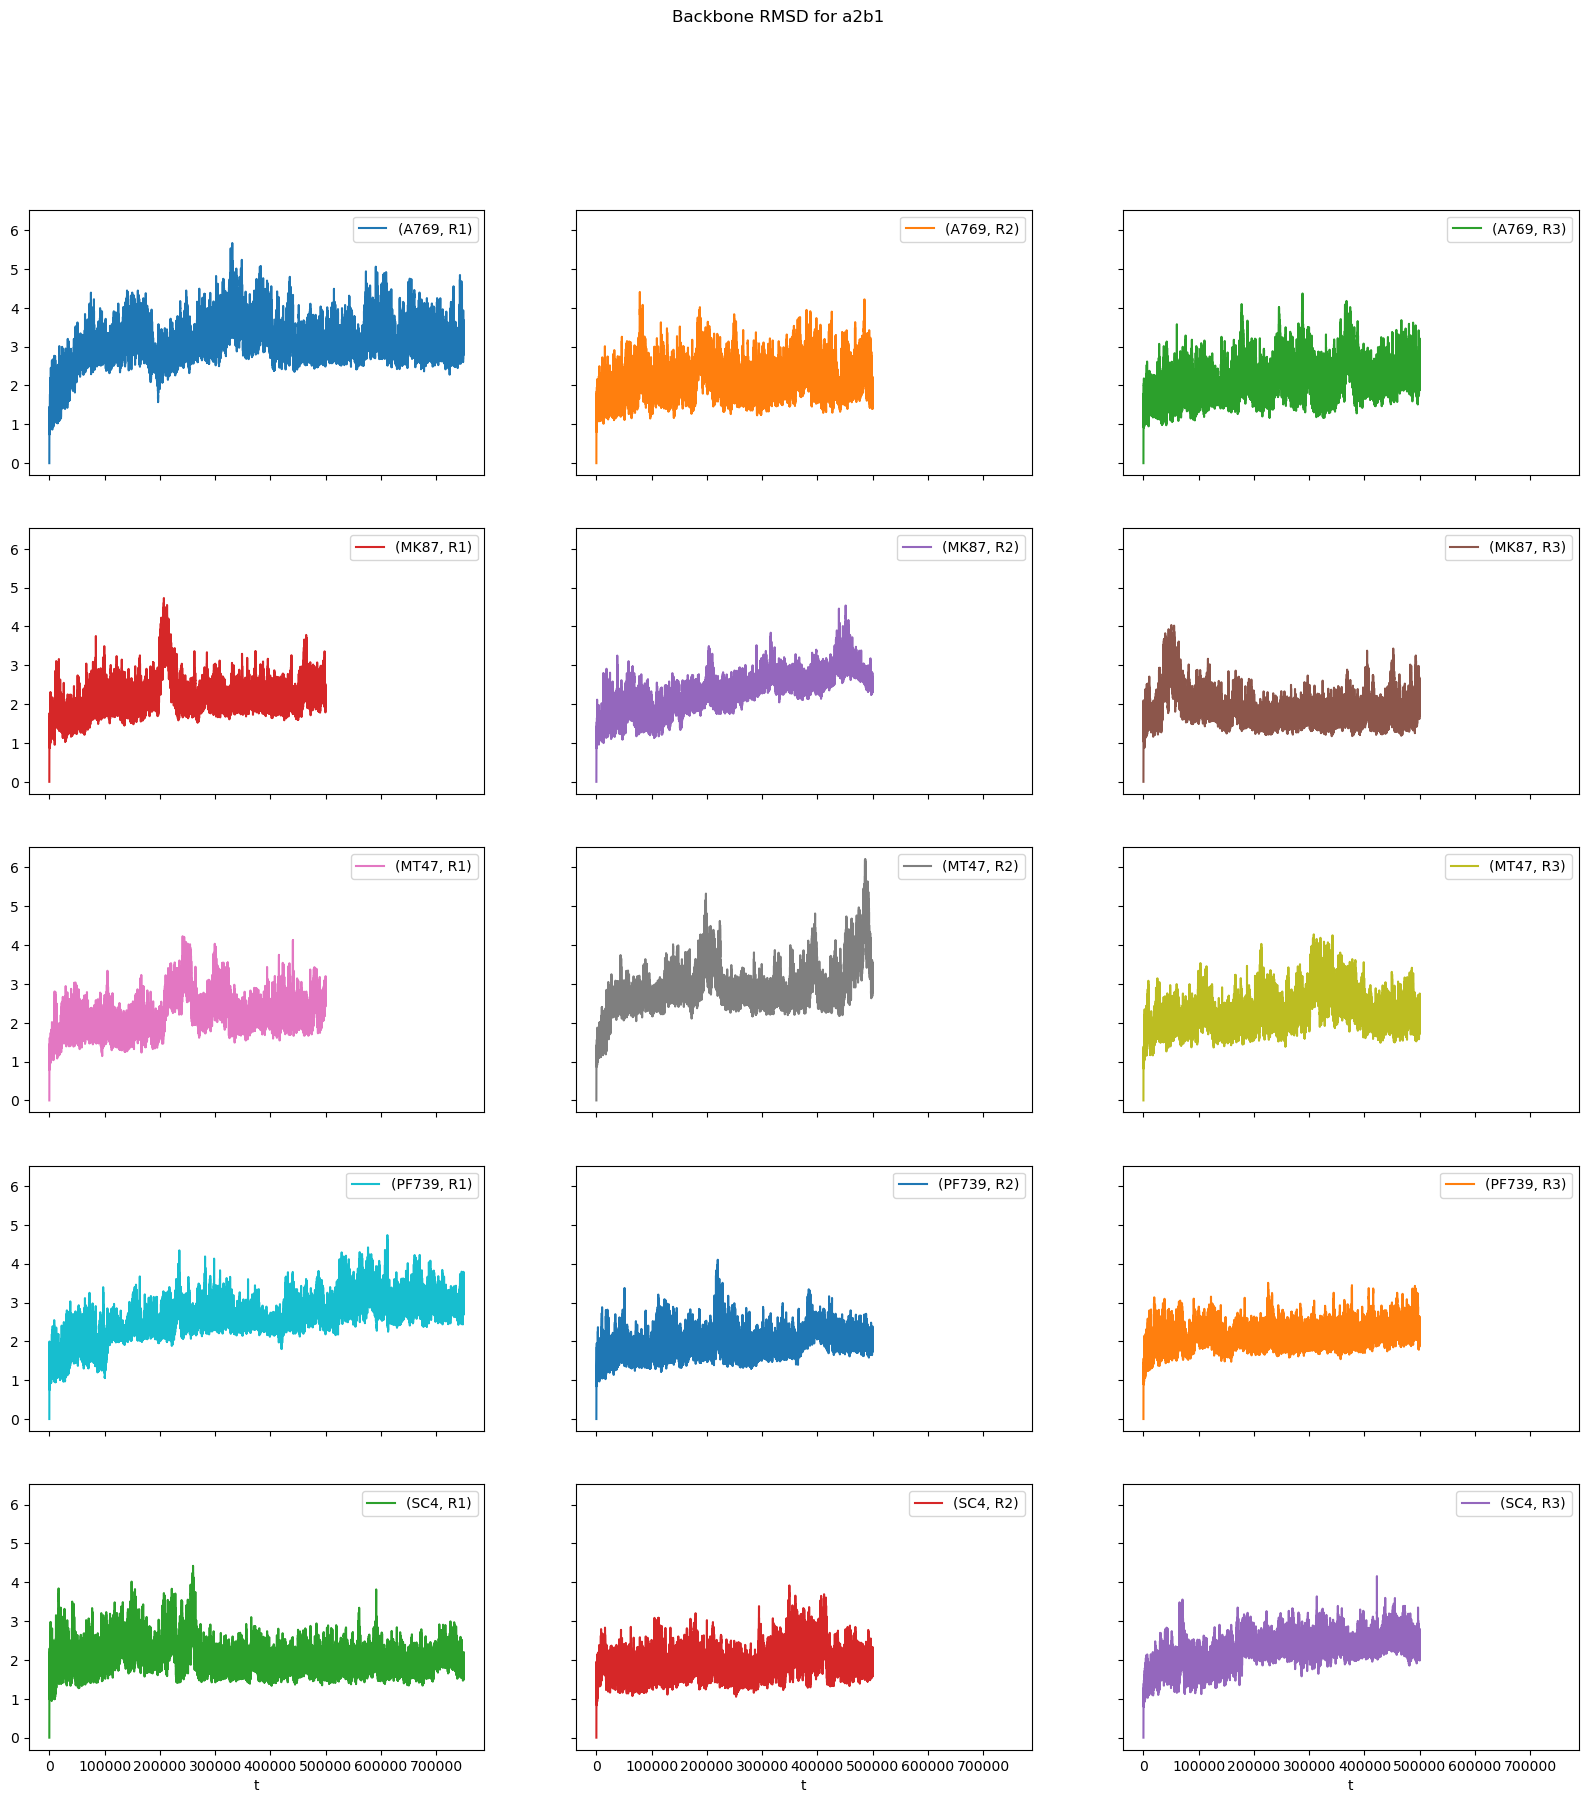

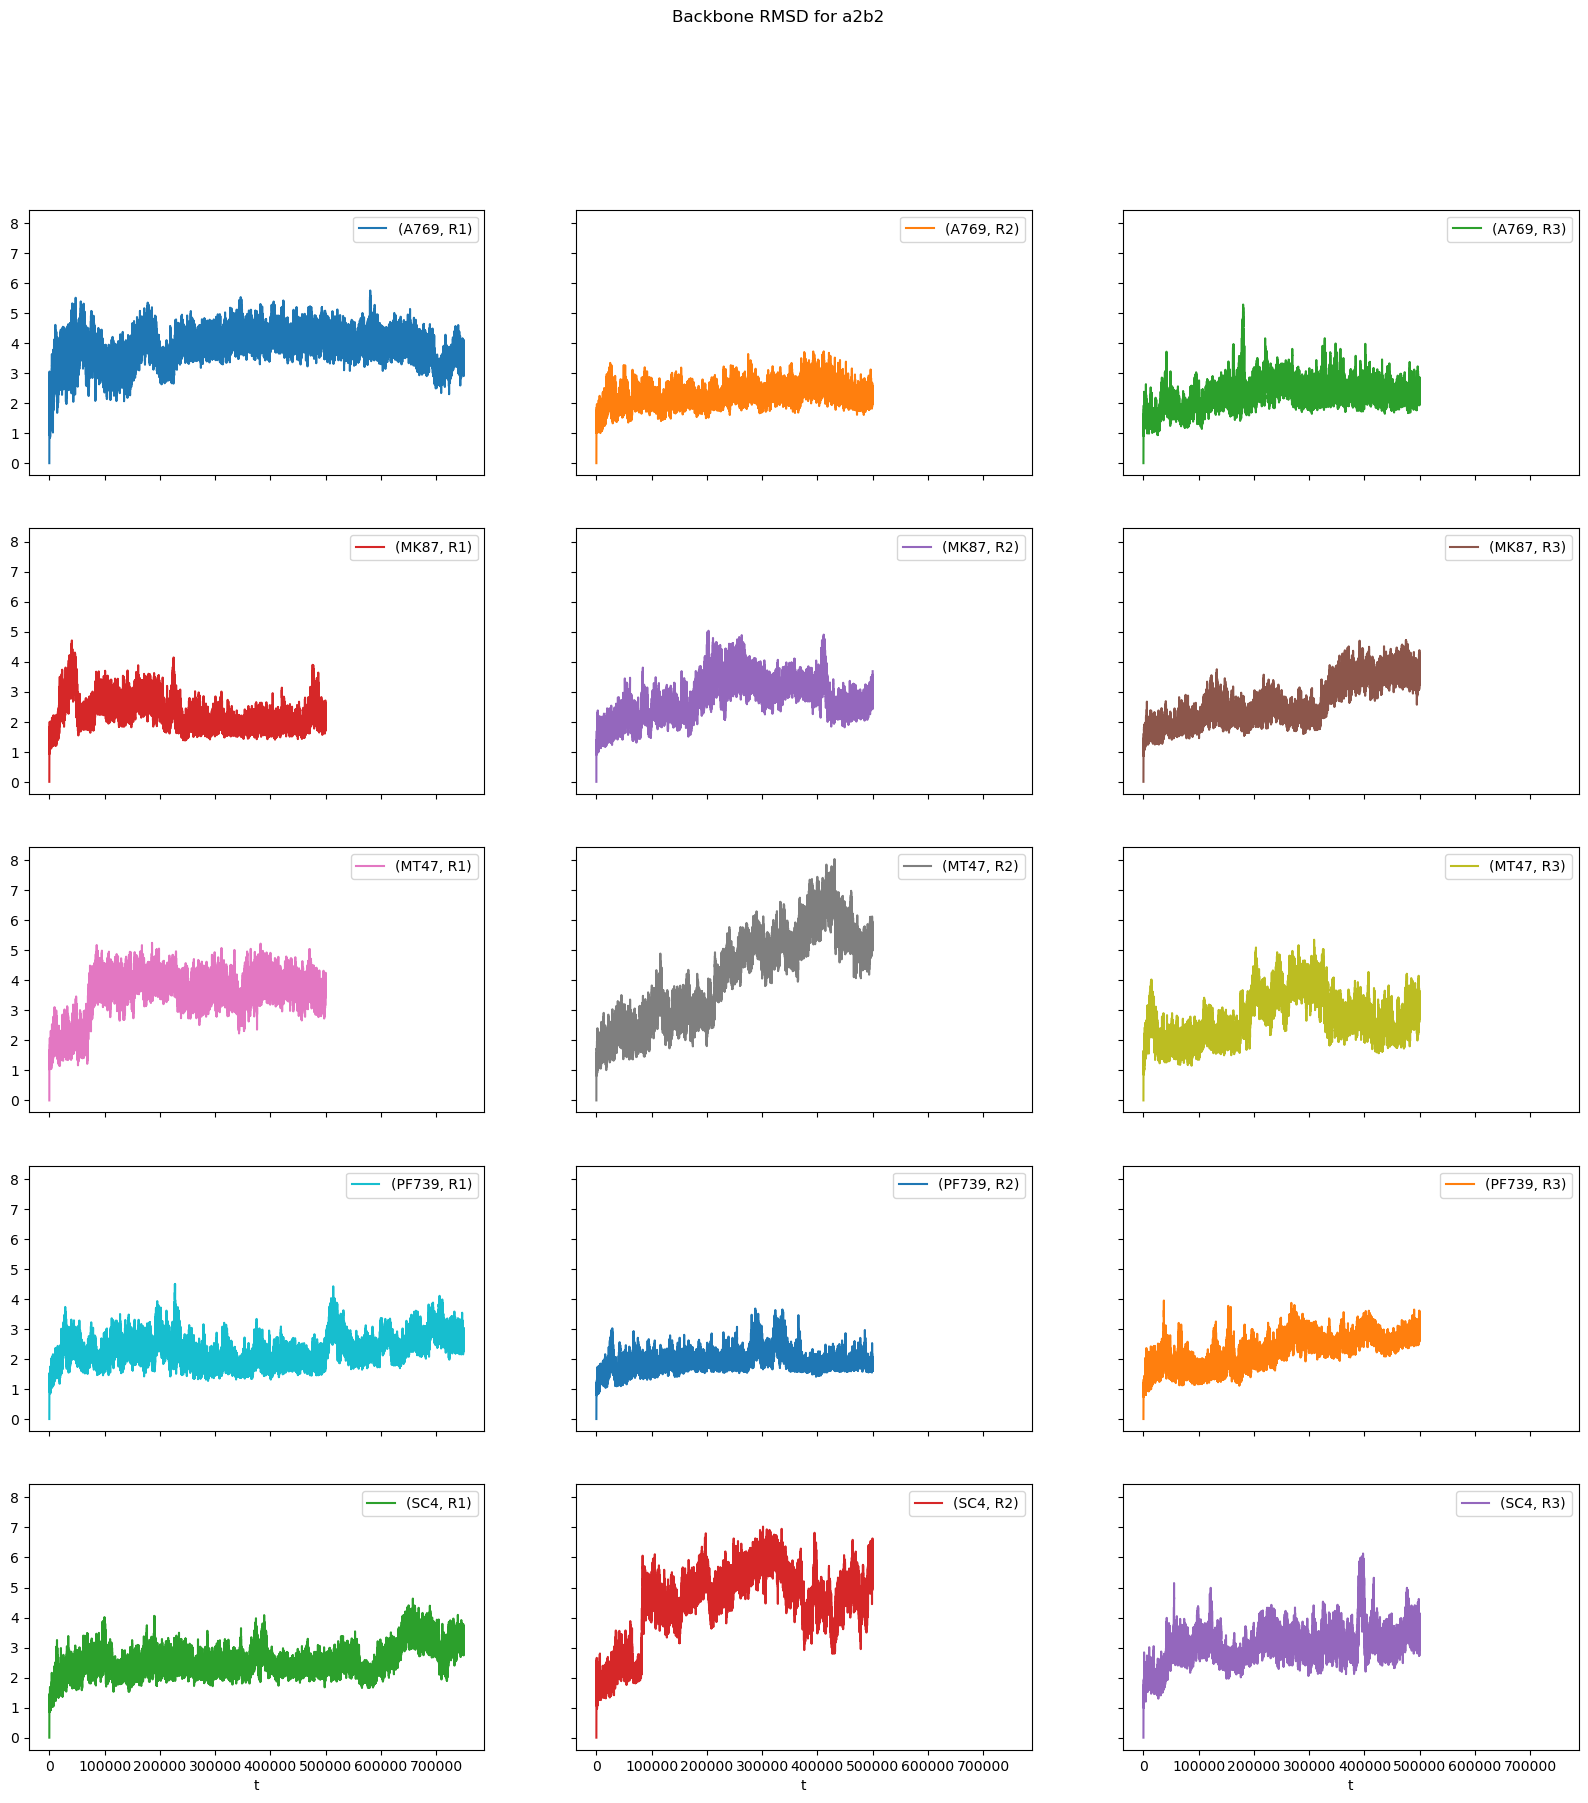

In [18]:
for s in ['a2b1', 'a2b2']:
    df[s].plot(subplots=True,
               sharex=True,
               sharey=True,
               layout=(5,3),
               figsize=(20,20),
               title=f'Backbone RMSD for {s}')